In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Oklahoma_Lamont/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Oklahoma_Lamont/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Oklahoma_Lamont/LandSat_Nppy.csv')

In [ ]:
Gpp.shape

(69069, 6)

In [ ]:
Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,57.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,1,2.015012e+11,220.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2,2.015020e+11,219.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
3,3,2.015022e+11,110.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,4,2.015031e+11,588.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


In [ ]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,2045
latitude,0
longitude,0
.geo,0


In [ ]:

Gpp.dropna(inplace=True)

In [ ]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,2015-03-06,0.0588,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


In [ ]:
Gpp['Year'] = Gpp['Date'].dt.year

In [ ]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015
4,2015-03-06,0.0588,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015


In [ ]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [ ]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,36.601003,-97.493843,1.2758
1,2015,36.601003,-97.493574,1.1300
2,2015,36.601003,-97.493304,1.0823
3,2015,36.601003,-97.493035,1.1117
4,2015,36.601003,-97.492765,1.1659


In [ ]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [ ]:
Gppy.shape

(2925, 4)

In [ ]:
Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015,1.2758
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015,1.2758
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015,1.2758
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015,1.2758
4,2015-03-06,0.0588,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",2015,1.2758


In [ ]:
Gpp_merged.shape

(67024, 7)

In [ ]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [ ]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758
4,2015-03-06,0.0588,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758


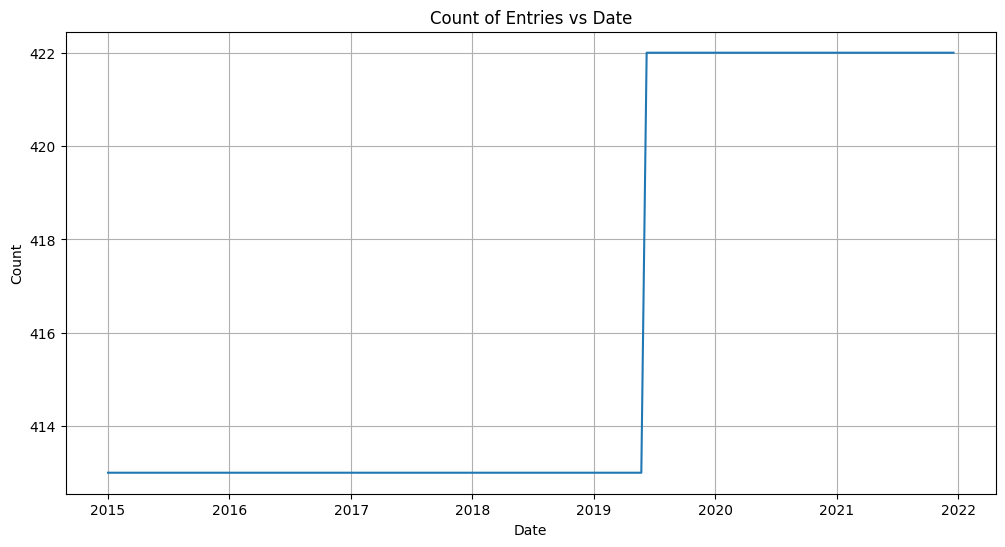

In [ ]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


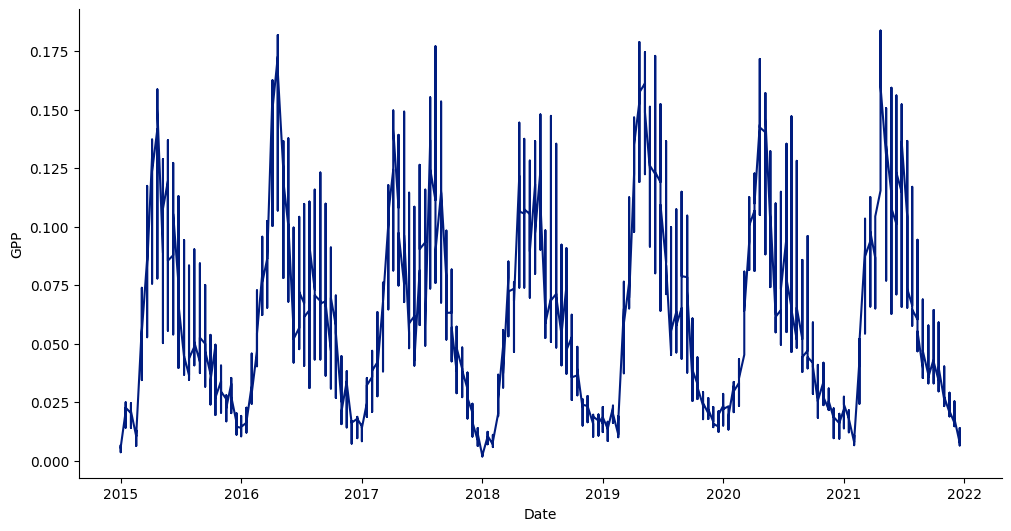

In [ ]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('dark')
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [ ]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

        latitude  longitude
0      36.601003 -97.493843
161    36.601003 -97.493574
322    36.601003 -97.493304
483    36.601003 -97.493035
644    36.601003 -97.492765
...          ...        ...
66729  36.608010 -97.490879
66788  36.608010 -97.490609
66847  36.608010 -97.490340
66906  36.608010 -97.490070
66965  36.608010 -97.489801

[429 rows x 2 columns]


In [ ]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,0.571394,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,1,2.015011e+11,0.592871,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2,2.015012e+11,0.550431,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
3,3,2.015012e+11,NaN,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,4,2.015020e+11,0.584037,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


In [ ]:
ndvi.shape

(138138, 6)

In [ ]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,96061
latitude,0
longitude,0
.geo,0


In [ ]:
ndvi.dropna(inplace=True)

In [ ]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
0,2015-01-01,0.571394,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,2015-01-09,0.592871,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2015-01-16,0.550431,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,2015-02-01,0.584037,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
6,2015-02-17,0.587108,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


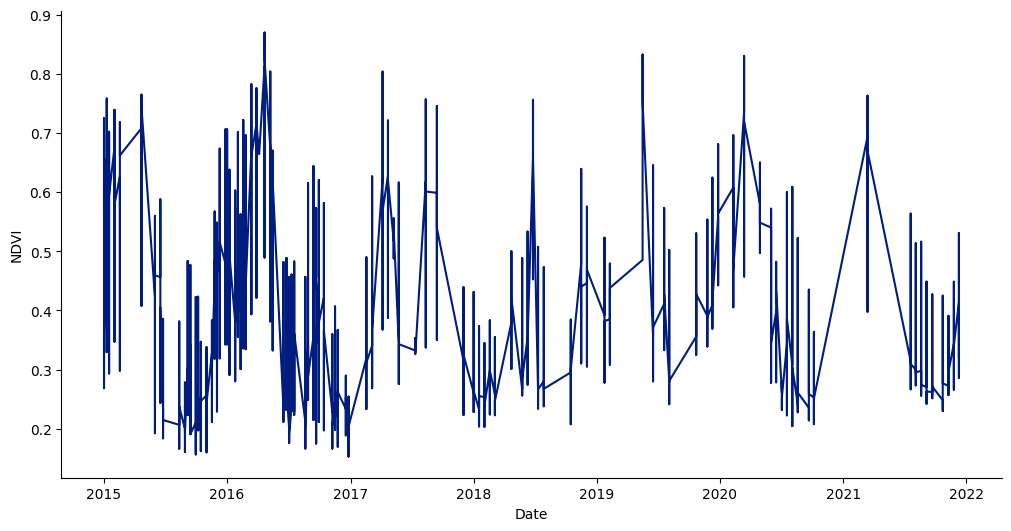

In [ ]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('dark')
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

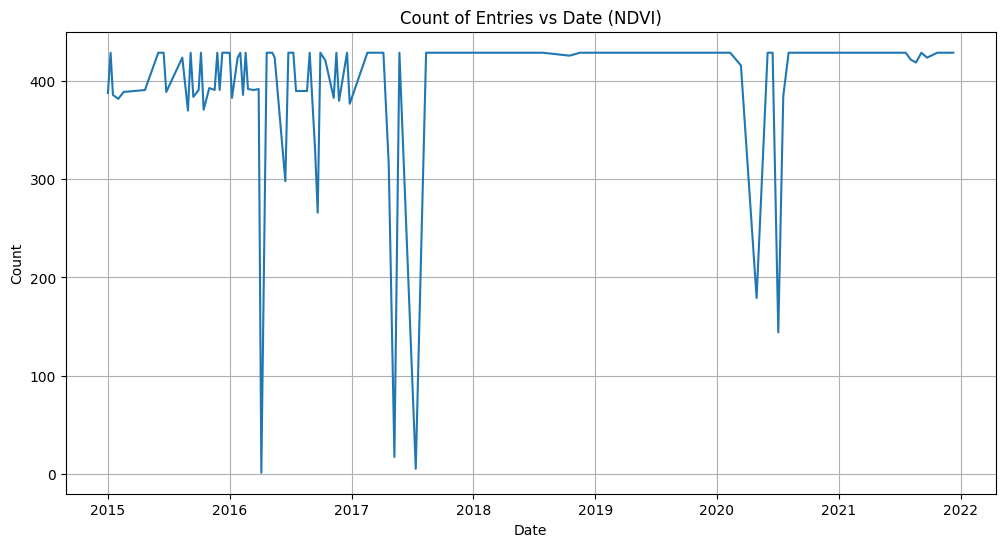

In [ ]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [ ]:
ndvi.drop(columns=['.geo'],inplace=True)

In [ ]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.571394
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.550431
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.584037
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.587108
4,2015-04-22,0.1399,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.573849


In [ ]:
merged_df.shape

(19518, 7)

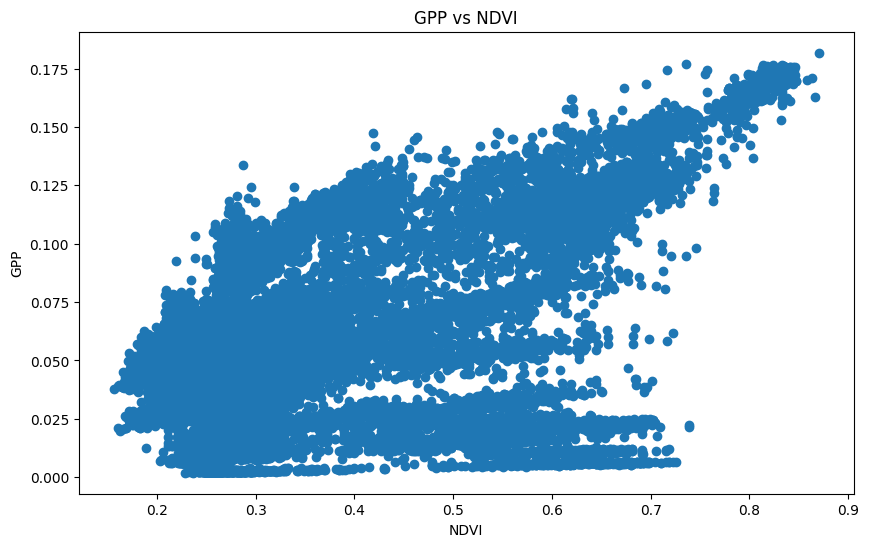

In [ ]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [ ]:
Nppy.shape

(2574, 6)

In [ ]:
Nppy.isna().sum()

,0
system:index,0
Date,0
NPPy,78
latitude,0
longitude,0
.geo,0


In [ ]:
Nppy.dropna(inplace=True)

In [ ]:
Nppy.head()

,system:index,Date,NPPy,latitude,longitude,.geo
0,0,2.015010e+11,7403.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,1,2.016010e+11,7972.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2,2.017010e+11,7855.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
3,3,2.018010e+11,6615.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,4,2.019010e+11,8519.0,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


In [ ]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
0,2015-01-01,0.7403,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
1,2016-01-01,0.7972,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
2,2017-01-01,0.7855,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
3,2018-01-01,0.6615,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."
4,2019-01-01,0.8519,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514..."


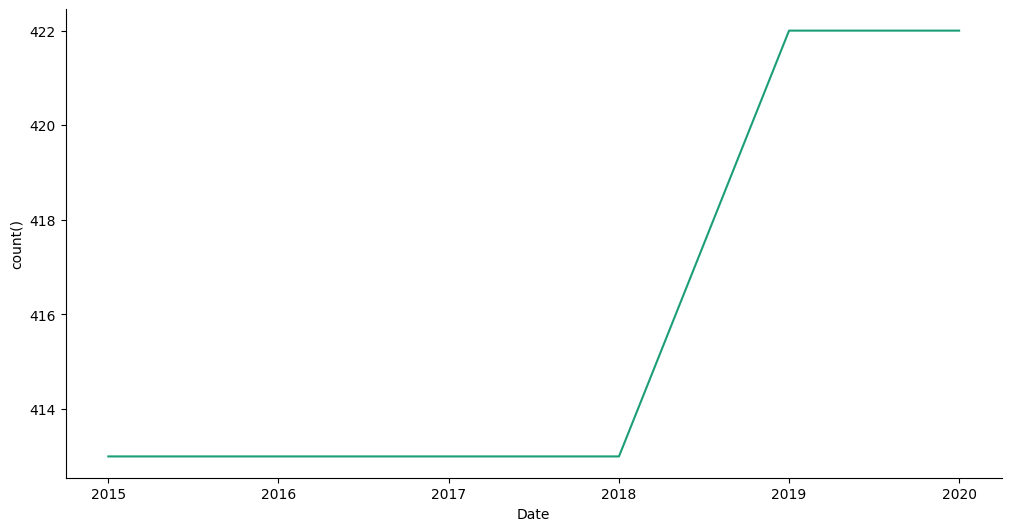

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

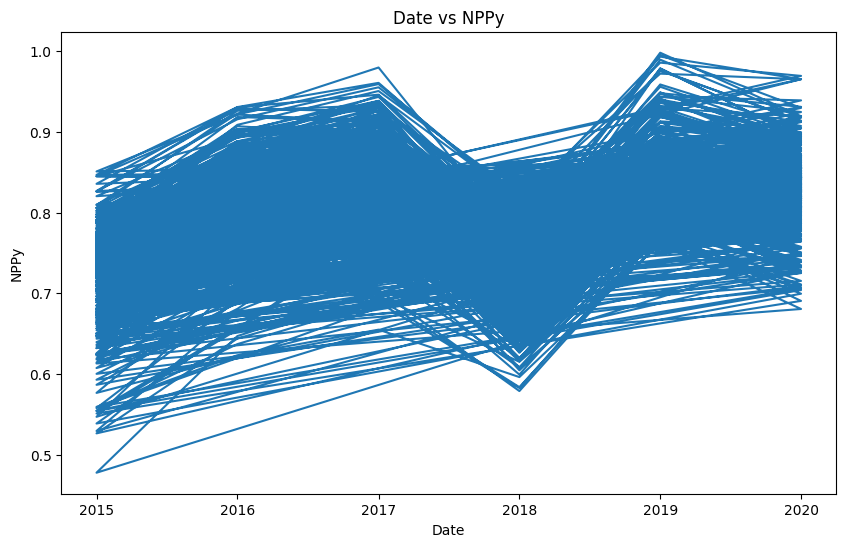

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

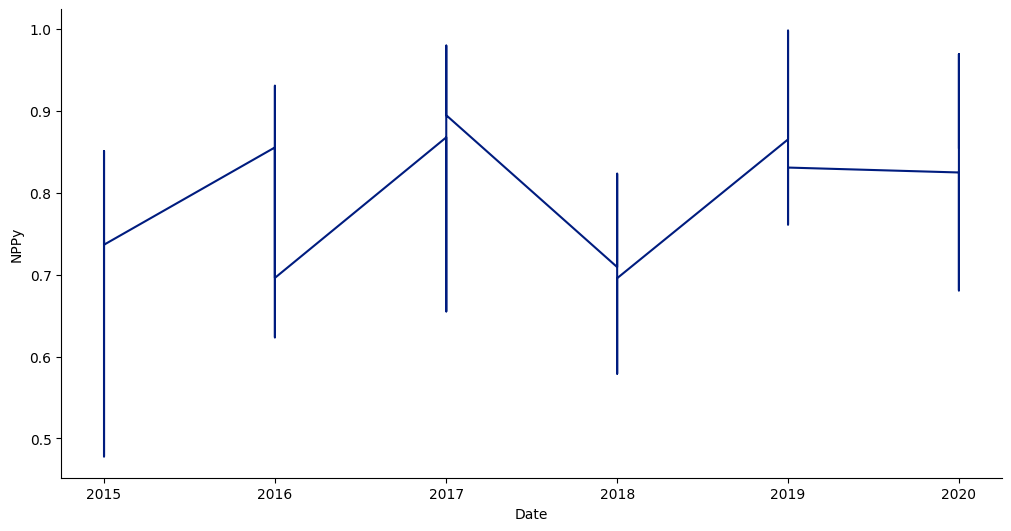

In [ ]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette = sns.color_palette('dark')
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year

In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
0,2015-01-01,0.7403,36.601003,-97.493843,2015
1,2016-01-01,0.7972,36.601003,-97.493843,2016
2,2017-01-01,0.7855,36.601003,-97.493843,2017
3,2018-01-01,0.6615,36.601003,-97.493843,2018
4,2019-01-01,0.8519,36.601003,-97.493843,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.571394,2015
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.550431,2015
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.584037,2015
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.587108,2015
4,2015-04-22,0.1399,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.573849,2015


In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-01-01,0.0057,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.571394,2015,0.7403
1,2015-01-16,0.0220,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.550431,2015,0.7403
2,2015-02-01,0.0219,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.584037,2015,0.7403
3,2015-02-17,0.0110,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.587108,2015,0.7403
4,2015-04-22,0.1399,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",1.2758,0.573849,2015,0.7403


In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0057,0.571394,1.2758,0.7403
1,2015-01-16,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0220,0.550431,1.2758,0.7403
2,2015-02-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0219,0.584037,1.2758,0.7403
3,2015-02-17,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0110,0.587108,1.2758,0.7403
4,2015-04-22,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.1399,0.573849,1.2758,0.7403


In [ ]:
merged_data.shape

(19518, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-01-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0057,0.571394,1.2758,0.7403
1,2015-01-16,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0220,0.550431,1.2758,0.7403
2,2015-02-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0219,0.584037,1.2758,0.7403
3,2015-02-17,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0110,0.587108,1.2758,0.7403
4,2015-04-22,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.1399,0.573849,1.2758,0.7403


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-01-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0057,0.571394,1.2758,0.7403,0.003308
1,2015-01-16,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0220,0.550431,1.2758,0.7403,0.012766
2,2015-02-01,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0219,0.584037,1.2758,0.7403,0.012708
3,2015-02-17,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0110,0.587108,1.2758,0.7403,0.006383
4,2015-04-22,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.1399,0.573849,1.2758,0.7403,0.081179


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(19518, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Oklahoma_Lamont/Oklahoma_satellite_data.csv', index=False)


# Weather data from Flux towers

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Oklahoma/US_ARM_SGP.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,TAU_1_1_1,H_1_1_1,LE_1_1_1,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,...,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
0,200301010000,200301010030,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.0000,-9999.0000
1,200301010030,200301010100,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.0000,-9999.0000
2,200301010100,200301010130,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.0000,-9999.0000
3,200301010130,200301010200,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.0000,-9999.0000
4,200301010200,200301010230,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,...,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.0000,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372559,202404011530,202404011600,-0.095730,-0.105518,67.9003,0.061785,2.10666,8.49847,293.76000,0.289964,...,13.4123,40.2000,13.3233,18.4000,14.5703,13.8,14.8173,3.20593,97.9533,20.1040
372560,202404011600,202404011630,-0.234417,-47.630400,-9999.0000,-9999.000000,6.23355,12.27770,340.93800,0.451876,...,13.4323,40.2000,13.3460,18.4000,14.5807,13.8,14.8437,15.23050,128.5170,17.1780
372561,202404011630,202404011700,-0.211417,-36.179200,101.7700,-0.019895,6.04266,11.36220,351.29400,0.429283,...,13.4597,40.2000,13.3713,18.3867,14.5867,13.8,14.8677,5.13050,126.7760,16.9900
372562,202404011700,202404011730,-0.378753,16.810000,175.1490,-3.419330,6.95394,14.02210,357.21700,0.575055,...,13.4807,40.2033,13.3917,18.3800,14.5873,13.8,14.8913,146.74900,173.4030,18.2077


In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-99-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-99-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,TAU_1_1_1,H_1_1_1,LE_1_1_1,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,MO_LENGTH_1_1_1,...,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
210383,2015-01-01,-0.037679,13.11860,7.63066,-0.005482,2.67753,4.44073,192.03000,0.174047,-34.7909,...,-9999.0000,-9999.0000,-9999.00000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.00000,-9999.00000
210384,2015-01-01,-0.016769,10.12140,8.34318,0.256128,2.29352,3.59173,202.83100,0.116240,-13.4306,...,-9999.0000,-9999.0000,-9999.00000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.00000,-9999.00000
210385,2015-01-01,-0.024405,7.62354,6.75861,0.228148,2.42477,4.01140,220.87700,0.140415,-31.4163,...,-9999.0000,-9999.0000,-9999.00000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.00000,-9999.00000
210386,2015-01-01,-0.018825,5.97989,6.07505,0.296429,2.24084,3.55362,222.65300,0.123377,-27.1692,...,-9999.0000,-9999.0000,-9999.00000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.00000,-9999.00000
210387,2015-01-01,-0.017978,6.58212,6.40629,0.239479,1.96494,3.89945,227.37100,0.120675,-23.0871,...,-9999.0000,-9999.0000,-9999.00000,-9999.0000,-9999.0000,-9999.0,-9999.0000,-9999.00000,-9999.00000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333114,2021-12-31,-0.271170,-63.59000,-9999.00000,4.594080,4.85599,9.84249,222.22700,0.483001,150.9160,...,10.0220,41.4767,9.88400,17.1000,10.2083,12.5,10.2547,1.28783,1.73773,13.36170
333115,2021-12-31,-0.037014,-82.06280,-9999.00000,8.504280,3.13892,9.47611,6.29638,0.176478,5.7023,...,10.0420,41.5000,9.91867,17.1000,10.2323,12.5,10.2880,1.34410,10.20910,8.75877
333116,2021-12-31,-0.131313,-15.61210,65.49550,-3.866640,5.45317,9.02604,4.34670,0.329606,195.2520,...,10.0680,41.5067,9.94233,17.1000,10.2760,12.5,10.3263,1.14747,6.36713,4.25033
333117,2021-12-31,-0.107126,3.19706,22.15510,0.551532,5.52898,9.25262,13.70740,0.297205,-698.9620,...,10.0957,41.5067,9.97200,17.1000,10.3057,12.5,10.3347,0.70900,3.11107,3.96787


In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,TAU_1_1_1,H_1_1_1,LE_1_1_1,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,MO_LENGTH_1_1_1,...,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
210383,2015-01-01,-0.037679,13.11860,7.63066,-0.005482,2.67753,4.44073,192.030,0.174047,-34.7909,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
210384,2015-01-01,-0.016769,10.12140,8.34318,0.256128,2.29352,3.59173,202.831,0.116240,-13.4306,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
210385,2015-01-01,-0.024405,7.62354,6.75861,0.228148,2.42477,4.01140,220.877,0.140415,-31.4163,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
210386,2015-01-01,-0.018825,5.97989,6.07505,0.296429,2.24084,3.55362,222.653,0.123377,-27.1692,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
210387,2015-01-01,-0.017978,6.58212,6.40629,0.239479,1.96494,3.89945,227.371,0.120675,-23.0871,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

<ipython-input-102-d87ba21fc32d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(-9999.0, np.nan, inplace=True)


,TIMESTAMP,TAU_1_1_1,H_1_1_1,LE_1_1_1,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,CO2_1_1_1,H2O_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,T_SONIC_SIGMA_1_1_1,FETCH_MAX_1_1_1,FETCH_70_1_1_1,FETCH_80_1_1_1,FETCH_90_1_1_1,TAU_SSITC_TEST_1_1_1,H_SSITC_TEST_1_1_1,LE_SSITC_TEST_1_1_1,FC_SSITC_TEST_1_1_1,PA_1_1_1,TA_1_1_1,RH_1_1_1,SWIN_1_1_1,LWIN_1_1_1,SWOUT_1_1_1,LWOUT_1_1_1,SWIN_1_1_2,PPFDIN_1_1_1,P_1_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,NETRAD_1_1_1,TAU_1_2_1,H_1_2_1,WS_1_2_1,WS_MAX_1_2_1,WD_1_2_1,USTAR_1_2_1,MO_LENGTH_1_2_1,T_SONIC_1_2_1,U_SIGMA_1_2_1,V_SIGMA_1_2_1,W_SIGMA_1_2_1,T_SONIC_SIGMA_1_2_1,FETCH_MAX_1_2_1,FETCH_70_1_2_1,FETCH_80_1_2_1,FETCH_90_1_2_1,TAU_SSITC_TEST_1_2_1,H_SSITC_TEST_1_2_1,TAU_1_3_1,H_1_3_1,WS_1_3_1,WS_MAX_1_3_1,WD_1_3_1,USTAR_1_3_1,MO_LENGTH_1_3_1,T_SONIC_1_3_1,U_SIGMA_1_3_1,V_SIGMA_1_3_1,W_SIGMA_1_3_1,T_SONIC_SIGMA_1_3_1,TAU_SSITC_TEST_1_3_1,H_SSITC_TEST_1_3_1,PPFDOUT_1_1_1,SWC_2_1_1,TS_2_1_1,SWC_2_2_1,TS_2_2_1,SWC_2_3_1,TS_2_3_1,SWC_2_4_1,TS_2_4_1,SWC_2_5_1,TS_2_5_1,SWC_2_6_1,TS_2_6_1,SWC_3_1_1,TS_3_1_1,SWC_3_1_2,TS_3_1_2,SWC_3_2_1,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
210383,2015-01-01,-0.037679,13.11860,7.63066,-0.005482,2.67753,4.44073,192.03000,0.174047,-34.7909,4.30490,404.955,4.76007,0.488762,0.456494,0.179140,0.211391,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,99.0470,NaN,NaN,0.000000,282.000,0.000000,288.090,NaN,0.004000,0.0,NaN,-27.97000,-25.700000,NaN,-6.0920,-0.070105,18.03880,3.09153,4.63371,189.42700,0.238465,-65.1139,7.09062,0.580237,0.419071,0.249108,0.159028,323.683,591.796,708.229,886.619,1.0,1.0,-0.090670,19.332600,3.25140,4.88218,193.22800,0.271842,-89.4570,5.85828,0.587107,0.447512,0.286936,0.159322,1.0,1.0,-0.016000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210384,2015-01-01,-0.016769,10.12140,8.34318,0.256128,2.29352,3.59173,202.83100,0.116240,-13.4306,4.84119,405.524,4.84265,0.337615,0.347712,0.164209,0.241842,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,99.0150,NaN,NaN,0.000000,283.400,0.000000,289.240,NaN,-0.032000,0.0,NaN,-27.24000,-25.150000,NaN,-5.8470,-0.019399,1.57684,2.66642,3.97899,201.09200,0.125533,-108.6640,7.48922,0.335035,0.367551,0.244329,0.194037,NaN,NaN,NaN,NaN,1.0,2.0,-0.055766,-2.419740,3.00690,4.34153,206.49400,0.213443,345.7730,6.29427,0.424693,0.415071,0.258854,0.170725,0.0,2.0,-0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210385,2015-01-01,-0.024405,7.62354,6.75861,0.228148,2.42477,4.01140,220.87700,0.140415,-31.4163,5.39654,405.417,4.76703,0.467325,0.414143,0.175196,0.142454,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,98.9440,NaN,NaN,0.000000,283.820,0.000000,290.540,NaN,-0.030000,0.0,NaN,-26.23000,-24.100000,NaN,-6.7200,-0.026732,10.76520,2.88136,4.17495,218.03900,0.147536,-25.8207,7.87451,0.457426,0.402171,0.227942,0.127782,NaN,NaN,NaN,NaN,0.0,0.0,-0.017760,6.646970,3.01589,4.09749,220.08000,0.120564,-22.6777,6.68063,0.406963,0.382331,0.283788,0.118848,0.0,1.0,-0.103000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210386,2015-01-01,-0.018825,5.97989,6.07505,0.296429,2.24084,3.55362,222.65300,0.123377,-27.1692,5.63961,405.559,4.80860,0.377457,0.508630,0.160101,0.146988,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,98.9140,NaN,NaN,0.000000,284.410,0.000000,291.140,NaN,-0.036000,0.0,NaN,-25.43000,-23.830000,NaN,-6.7350,-0.027352,4.78849,2.57010,3.76225,221.57000,0.149280,-60.1323,8.03655,0.349554,0.470600,0.187782,0.126313,NaN,NaN,NaN,NaN,1.0,0.0,-0.050491,0.436265,2.66150,3.88103,226.67200,0.203395,-1658.4200,6.84797,0.346408,0.460655,0.240787,0.112935,1.0,2.0,-0.062000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210387,2015-01-01,-0.017978,6.58212,6.40629,0.239479,1.96494,3.89945,227.37100,0.120675,-23.0871,5.95066,406.593,4.86037,0.4

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,TAU_1_1_1,H_1_1_1,LE_1_1_1,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,CO2_1_1_1,H2O_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,T_SONIC_SIGMA_1_1_1,FETCH_MAX_1_1_1,FETCH_70_1_1_1,FETCH_80_1_1_1,FETCH_90_1_1_1,TAU_SSITC_TEST_1_1_1,H_SSITC_TEST_1_1_1,LE_SSITC_TEST_1_1_1,FC_SSITC_TEST_1_1_1,PA_1_1_1,TA_1_1_1,RH_1_1_1,SWIN_1_1_1,LWIN_1_1_1,SWOUT_1_1_1,LWOUT_1_1_1,SWIN_1_1_2,PPFDIN_1_1_1,P_1_1_1,G_1_1_1,G_2_1_1,G_3_1_1,G_4_1_1,NETRAD_1_1_1,TAU_1_2_1,H_1_2_1,WS_1_2_1,WS_MAX_1_2_1,WD_1_2_1,USTAR_1_2_1,MO_LENGTH_1_2_1,T_SONIC_1_2_1,U_SIGMA_1_2_1,V_SIGMA_1_2_1,W_SIGMA_1_2_1,T_SONIC_SIGMA_1_2_1,FETCH_MAX_1_2_1,FETCH_70_1_2_1,FETCH_80_1_2_1,FETCH_90_1_2_1,TAU_SSITC_TEST_1_2_1,H_SSITC_TEST_1_2_1,TAU_1_3_1,H_1_3_1,WS_1_3_1,WS_MAX_1_3_1,WD_1_3_1,USTAR_1_3_1,MO_LENGTH_1_3_1,T_SONIC_1_3_1,U_SIGMA_1_3_1,V_SIGMA_1_3_1,W_SIGMA_1_3_1,T_SONIC_SIGMA_1_3_1,TAU_SSITC_TEST_1_3_1,H_SSITC_TEST_1_3_1,PPFDOUT_1_1_1,SWC_2_1_1,TS_2_1_1,SWC_2_2_1,TS_2_2_1,SWC_2_3_1,TS_2_3_1,SWC_2_4_1,TS_2_4_1,SWC_2_5_1,TS_2_5_1,SWC_2_6_1,TS_2_6_1,SWC_3_1_1,TS_3_1_1,SWC_3_1_2,TS_3_1_2,SWC_3_2_1,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
210383,2015-01-01,-0.037679,13.11860,7.63066,-0.005482,2.67753,4.44073,192.03000,0.174047,-34.7909,4.30490,404.955,4.76007,0.488762,0.456494,0.179140,0.211391,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,99.0470,NaN,NaN,0.000000,282.000,0.000000,288.090,NaN,0.004000,0.0,NaN,-27.97000,-25.700000,NaN,-6.0920,-0.070105,18.03880,3.09153,4.63371,189.42700,0.238465,-65.1139,7.09062,0.580237,0.419071,0.249108,0.159028,323.683,591.796,708.229,886.619,1.0,1.0,-0.090670,19.332600,3.25140,4.88218,193.22800,0.271842,-89.4570,5.85828,0.587107,0.447512,0.286936,0.159322,1.0,1.0,-0.016000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210384,2015-01-01,-0.016769,10.12140,8.34318,0.256128,2.29352,3.59173,202.83100,0.116240,-13.4306,4.84119,405.524,4.84265,0.337615,0.347712,0.164209,0.241842,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,99.0150,NaN,NaN,0.000000,283.400,0.000000,289.240,NaN,-0.032000,0.0,NaN,-27.24000,-25.150000,NaN,-5.8470,-0.019399,1.57684,2.66642,3.97899,201.09200,0.125533,-108.6640,7.48922,0.335035,0.367551,0.244329,0.194037,NaN,NaN,NaN,NaN,1.0,2.0,-0.055766,-2.419740,3.00690,4.34153,206.49400,0.213443,345.7730,6.29427,0.424693,0.415071,0.258854,0.170725,0.0,2.0,-0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210385,2015-01-01,-0.024405,7.62354,6.75861,0.228148,2.42477,4.01140,220.87700,0.140415,-31.4163,5.39654,405.417,4.76703,0.467325,0.414143,0.175196,0.142454,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,98.9440,NaN,NaN,0.000000,283.820,0.000000,290.540,NaN,-0.030000,0.0,NaN,-26.23000,-24.100000,NaN,-6.7200,-0.026732,10.76520,2.88136,4.17495,218.03900,0.147536,-25.8207,7.87451,0.457426,0.402171,0.227942,0.127782,NaN,NaN,NaN,NaN,0.0,0.0,-0.017760,6.646970,3.01589,4.09749,220.08000,0.120564,-22.6777,6.68063,0.406963,0.382331,0.283788,0.118848,0.0,1.0,-0.103000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210386,2015-01-01,-0.018825,5.97989,6.07505,0.296429,2.24084,3.55362,222.65300,0.123377,-27.1692,5.63961,405.559,4.80860,0.377457,0.508630,0.160101,0.146988,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,98.9140,NaN,NaN,0.000000,284.410,0.000000,291.140,NaN,-0.036000,0.0,NaN,-25.43000,-23.830000,NaN,-6.7350,-0.027352,4.78849,2.57010,3.76225,221.57000,0.149280,-60.1323,8.03655,0.349554,0.470600,0.187782,0.126313,NaN,NaN,NaN,NaN,1.0,0.0,-0.050491,0.436265,2.66150,3.88103,226.67200,0.203395,-1658.4200,6.84797,0.346408,0.460655,0.240787,0.112935,1.0,2.0,-0.062000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210387,2015-01-01,-0.017978,6.58212,6.40629,0.239479,1.96494,3.89945,227.37100,0.120675,-23.0871,5.95066,406.593,4.86037,0.4

In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,FETCH,G,H,H2O,LE,LWIN,LWOUT,MO,NETRAD,P,PA,PPFDIN,PPFDOUT,RH,SW,SWC,SWIN,SWOUT,T,TA,TAU,TS,U,USTAR,V,W,WD,WS
210383,2015-01-01,404.955,1.000000,886.619,-25.700000,19.33260,4.76007,7.63066,282.000,288.090,-34.7909,-6.0920,0.0,99.0470,0.004000,-0.016000,NaN,NaN,NaN,0.00000,0.000000,7.09062,NaN,1.0,NaN,0.587107,0.271842,0.456494,0.286936,193.22800,4.88218
210384,2015-01-01,405.524,1.000000,NaN,-25.150000,10.12140,4.84265,8.34318,283.400,289.240,345.7730,-5.8470,0.0,99.0150,-0.032000,-0.080000,NaN,NaN,NaN,0.00000,0.000000,7.48922,NaN,1.0,NaN,0.424693,0.213443,0.415071,0.258854,206.49400,4.34153
210385,2015-01-01,405.417,1.000000,NaN,-24.100000,10.76520,4.76703,6.75861,283.820,290.540,-22.6777,-6.7200,0.0,98.9440,-0.030000,-0.103000,NaN,NaN,NaN,0.00000,0.000000,7.87451,NaN,0.0,NaN,0.467325,0.147536,0.414143,0.283788,220.87700,4.17495
210386,2015-01-01,405.559,2.000000,NaN,-23.830000,5.97989,4.80860,6.07505,284.410,291.140,-27.1692,-6.7350,0.0,98.9140,-0.036000,-0.062000,NaN,NaN,NaN,0.00000,0.000000,8.03655,NaN,1.0,NaN,0.377457,0.203395,0.508630,0.240787,226.67200,3.88103
210387,2015-01-01,406.593,0.239479,NaN,-22.640000,6.58212,4.86037,6.40629,289.360,292.440,-23.0871,-3.0870,0.0,98.9020,-0.034000,-0.067000,NaN,NaN,NaN,0.00000,0.000000,8.28669,NaN,0.0,NaN,0.527990,0.145059,0.398245,0.247236,227.37100,4.00335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333114,2021-12-31,396.482,4.594080,1874.650,34.044900,2.00000,15.35340,1.00000,351.730,372.660,474.3740,-22.2811,0.0,96.5867,0.000000,0.000000,74.3823,1.73773,41.4767,3.02607,0.251067,16.58790,14.65670,2.0,13.4360,3.634800,0.869270,1.278520,0.569075,222.22700,12.75120
333115,2021-12-31,410.466,8.504280,1560.430,7.502030,2.00000,10.12610,2.00000,339.937,350.547,29.5861,-11.5840,0.0,96.6733,0.000000,0.000000,64.3890,10.20910,41.5000,11.55200,-4.010030,11.06320,9.15450,2.0,13.4347,2.157460,0.448645,2.814500,0.437086,354.80000,11.41790
333116,2021-12-31,417.429,1.000000,1135.380,4.948330,2.00000,7.72307,65.49550,313.237,327.857,195.2520,-18.7415,0.0,96.7233,0.253367,-0.137500,64.0710,6.36713,41.5067,7.51463,0.167367,6.26460,4.82187,1.0,13.4330,1.003140,0.329606,1.055540,0.352864,9.07778,10.19790
333117,2021-12-31,413.813,2.000000,1161.030,0.622933,12.36400,7.72217,22.15510,315.137,325.727,-234.6680,-11.0890,0.0,96.7133,1.266830,0.412500,64.7840,3.11107,41.5067,3.82007,-0.204600,4.66491,3.85867,0.0,13.4253,1.072690,0.323746,0.961670,0.397250,18.17150,10.63370


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']].head())

         TIMESTAMP         H  TS  TA       WS       WD      PA  RH    P
210383  2015-01-01  19.33260 NaN NaN  4.88218  193.228  99.047 NaN  0.0
210384  2015-01-01  10.12140 NaN NaN  4.34153  206.494  99.015 NaN  0.0
210385  2015-01-01  10.76520 NaN NaN  4.17495  220.877  98.944 NaN  0.0
210386  2015-01-01   5.97989 NaN NaN  3.88103  226.672  98.914 NaN  0.0
210387  2015-01-01   6.58212 NaN NaN  4.00335  227.371  98.902 NaN  0.0


In [ ]:
data.shape

(113961, 31)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,12604
FC,3286
FETCH,32896
G,12481
H,472
H2O,11473
LE,6311
LWIN,14449
LWOUT,14449


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH','P']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH', 'P'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH,P
TIMESTAMP,,,,,,,,
2016-05-18,2.633853,17.845200,14.362900,7.537083,108.758233,98.353333,74.542533,0.0
2016-05-19,27.954953,17.201780,15.070907,8.288530,134.797667,97.891773,82.857653,0.0
2016-05-20,48.048952,18.321100,17.975110,6.188267,139.098143,97.907457,75.784705,0.0
2016-05-21,31.981684,19.375667,20.917014,10.499868,131.469286,98.036750,78.672088,0.0
2016-05-22,28.792600,20.696181,22.353325,12.250841,149.675021,97.739994,78.171558,0.0


In [ ]:
data_agg.shape

(1984, 8)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH,P
0,2016-05-18,2.633853,17.845200,14.362900,7.537083,108.758233,98.353333,74.542533,0.0
1,2016-05-19,27.954953,17.201780,15.070907,8.288530,134.797667,97.891773,82.857653,0.0
2,2016-05-20,48.048952,18.321100,17.975110,6.188267,139.098143,97.907457,75.784705,0.0
3,2016-05-21,31.981684,19.375667,20.917014,10.499868,131.469286,98.036750,78.672088,0.0
4,2016-05-22,28.792600,20.696181,22.353325,12.250841,149.675021,97.739994,78.171558,0.0


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0
P,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-16 00:00:00', '2015-02-01 00:00:00',
 '2015-02-17 00:00:00', '2015-04-22 00:00:00', '2015-06-25 00:00:00',
 '2015-08-29 00:00:00', '2015-09-14 00:00:00', '2015-09-30 00:00:00',
 '2015-10-15 00:00:00', '2015-11-01 00:00:00', '2015-11-17 00:00:00',
 '2015-12-02 00:00:00', '2016-01-01 00:00:00', '2016-02-02 00:00:00',
 '2016-02-18 00:00:00', '2016-04-21 00:00:00', '2016-05-08 00:00:00',
 '2016-06-25 00:00:00', '2016-07-10 00:00:00', '2016-08-28 00:00:00',
 '2016-09-13 00:00:00', '2016-09-29 00:00:00', '2016-10-14 00:00:00',
 '2016-11-16 00:00:00', '2016-12-18 00:00:00', '2017-02-17 00:00:00',
 '2017-03-06 00:00:00', '2017-04-06 00:00:00', '2017-05-24 00:00:00',
 '2017-07-12 00:00:00', '2017-08-12 00:00:00', '2017-09-14 00:00:00',
 '2017-12-02 00:00:00', '2018-01-01 00:00:00', '2018-01-17 00:00:00',
 '2018-02-02 00:00:00', '2018-02-18 00:00:00', '2018-03-05 00:00:00',
 '2018-04-23 00:00:00', '2018-05-25 00:00:00', '2018-06-10 00:00:00',
 '20

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH,P
0,2016-06-25,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0559,0.279691,1.4129,0.7972,0.031540,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
1,2016-06-25,36.601003,-97.493574,"{""type"":""Point"",""coordinates"":[-97.49357388055...",0.0556,0.254125,1.2424,0.7148,0.031989,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
2,2016-06-25,36.601003,-97.493304,"{""type"":""Point"",""coordinates"":[-97.49330438597...",0.0538,0.244970,1.2016,0.6960,0.031162,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
3,2016-06-25,36.601003,-97.493035,"{""type"":""Point"",""coordinates"":[-97.49303489138...",0.0504,0.234970,1.2066,0.6955,0.029051,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
4,2016-06-25,36.601003,-97.492765,"{""type"":""Point"",""coordinates"":[-97.49276539680...",0.0490,0.234970,1.2348,0.7076,0.028079,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,2017-05-09,36.601542,-97.491148,"{""type"":""Point"",""coordinates"":[-97.49114842928...",0.0899,0.517731,1.5277,0.8574,0.050455,95.268357,20.952826,25.047078,10.892290,190.692259,97.621363,60.214385,0.0
11799,2017-05-09,36.601542,-97.490879,"{""type"":""Point"",""coordinates"":[-97.49087893470...",0.0907,0.537330,1.5225,0.8554,0.050959,95.268357,20.952826,25.047078,10.892290,190.692259,97.621363,60.214385,0.0
11800,2017-05-09,36.601811,-97.491418,"{""type"":""Point"",""coordinates"":[-97.49141792387...",0.0925,0.549857,1.5706,0.8764,0.051615,95.268357,20.952826,25.047078,10.892290,190.692259,97.621363,60.214385,0.0
11801,2017-05-09,36.601811,-97.491148,"{""type"":""Point"",""coordinates"":[-97.49114842928...",0.0912,0.531033,1.5437,0.8656,0.051139,95.268357,20.952826,25.047078,10.892290,190.692259,97.621363,60.214385,0.0


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2016-06-25,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0559,0.279691,1.4129,0.7972,0.031540,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
1,2016-06-25,36.601003,-97.493574,"{""type"":""Point"",""coordinates"":[-97.49357388055...",0.0556,0.254125,1.2424,0.7148,0.031989,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
2,2016-06-25,36.601003,-97.493304,"{""type"":""Point"",""coordinates"":[-97.49330438597...",0.0538,0.244970,1.2016,0.6960,0.031162,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
3,2016-06-25,36.601003,-97.493035,"{""type"":""Point"",""coordinates"":[-97.49303489138...",0.0504,0.234970,1.2066,0.6955,0.029051,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0
4,2016-06-25,36.601003,-97.492765,"{""type"":""Point"",""coordinates"":[-97.49276539680...",0.0490,0.234970,1.2348,0.7076,0.028079,93.204088,29.554783,29.558074,13.153678,184.233478,97.712463,58.413954,0.0


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


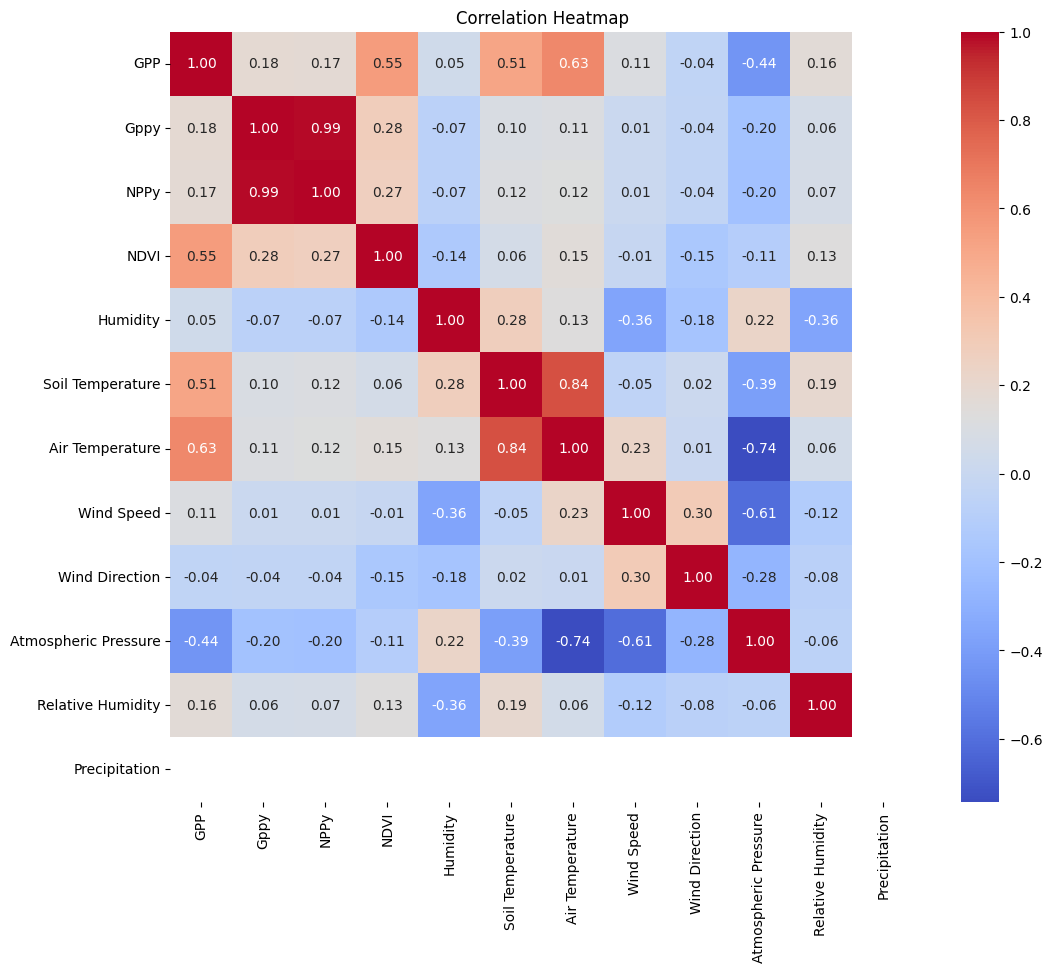

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity','Precipitation']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

Gppy and NPPy have a correlation of 0.99
Soil Temperature and Air Temperature have a correlation of 0.84


Since pairs such as (Gppy, Nppy) and (Soil Temperature, Air Temperature) have a high correlation we will drop Gppy and Air temperature.

In [ ]:
final_data.drop(columns=['Gppy','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity,Precipitation
0,2016-06-25,36.601003,-97.493843,"{""type"":""Point"",""coordinates"":[-97.49384337514...",0.0559,0.279691,0.7972,0.031540,93.204088,29.554783,13.153678,184.233478,97.712463,58.413954,0.0
1,2016-06-25,36.601003,-97.493574,"{""type"":""Point"",""coordinates"":[-97.49357388055...",0.0556,0.254125,0.7148,0.031989,93.204088,29.554783,13.153678,184.233478,97.712463,58.413954,0.0
2,2016-06-25,36.601003,-97.493304,"{""type"":""Point"",""coordinates"":[-97.49330438597...",0.0538,0.244970,0.6960,0.031162,93.204088,29.554783,13.153678,184.233478,97.712463,58.413954,0.0
3,2016-06-25,36.601003,-97.493035,"{""type"":""Point"",""coordinates"":[-97.49303489138...",0.0504,0.234970,0.6955,0.029051,93.204088,29.554783,13.153678,184.233478,97.712463,58.413954,0.0
4,2016-06-25,36.601003,-97.492765,"{""type"":""Point"",""coordinates"":[-97.49276539680...",0.0490,0.234970,0.7076,0.028079,93.204088,29.554783,13.153678,184.233478,97.712463,58.413954,0.0


In [ ]:
final_data.shape

(11803, 15)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Oklahoma_Lamont/Final_merged_data.csv', index=False)